## pandas

### Food Glycemic Index
- GI가 높은 식품(70이상)
- GI가 보통인 식품(55-69)
- GI 낮은 식품(55미만)

In [1]:
import pandas as pd

### FOOD GI 엑셀 데이터 읽기

In [5]:
datapath = 'data/gi_values.csfii_94-96_foodcodes.xls'
sheet_name = 'GI Summary'

In [6]:
df = pd.read_excel(datapath)

In [7]:
df.head()

,CSFII 1994-96 Food Code,Food Description in 1994-96 CSFII,GI Value,Value used in DHQ database
0,11000000,"Milk, human",NaN,NaN
1,11100000,"Milk, NFS",29.5,X
2,11111000,"Milk, cow's, fluid, whole",27,X
3,11111100,"Milk, cow's, fluid, whole, low-sodium",NaN,NaN
4,11111150,"Milk, calcium fortified, cow's, fluid, whole",NaN,NaN


### - 엑셀의 특정 sheet 읽기

#### -변수나 함수에 대해서 알고 싶은면 '?'를 이용
- pd.read_excel?
- ?pd.read_excel

In [5]:
pd.read_excel?

In [9]:
df = pd.read_excel(datapath,sheet_name=sheet_name,header=1 )

In [10]:
df.head()

,name,glycemic_index,error_range,category
0,White wheat bread*,75,2,1
1,Whole wheat/whole meal bread,74,2,1
2,Specialty grain bread,53,2,1
3,Unleavened wheat bread,70,5,1
4,Wheat roti,62,3,1


### - 데이터 탐색하기

In [11]:
df.shape

(62, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
name              62 non-null object
glycemic_index    62 non-null int64
error_range       62 non-null int64
category          62 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [13]:
df.describe()

,glycemic_index,error_range,category
count,62.000000,62.000000,62.000000
mean,55.467742,3.967742,3.548387
std,17.941360,1.819455,2.222666
min,15.000000,1.000000,1.000000
25%,43.000000,3.000000,1.250000
50%,54.000000,4.000000,3.000000
75%,66.500000,5.000000,5.000000
max,103.000000,9.000000,8.000000


In [14]:
import matplotlib.pyplot as plt
df.hist(figsize=(7,7), color='skyblue')
plt.show()

<Figure size 700x700 with 4 Axes>

### Boolean Indexing

In [17]:
# glycemin_index가 100이상인 항목
df [df['glycemic_index'] >= 100]

,name,glycemic_index,error_range,category
60,Glucose,103,3,8


In [18]:
# glycemin_index가 70이상인 항목의 name, glycemic_index
df [df['glycemic_index'] >= 70][['name', 'glycemic_index']]

,name,glycemic_index
0,White wheat bread*,75
1,Whole wheat/whole meal bread,74
3,Unleavened wheat bread,70
7,"White rice, boiled*",73
16,Cornflakes,81
19,Instant oat porridge,79
20,Rice porridge/congee,78
28,"Watermelon, raw",76
34,"Potato, boiled",78
35,"Potato, instant mash",87


In [22]:
# glycemin_index가 70이상인 항목의 name, glycemic_index
df.loc[df['glycemic_index'] >= 70, ['name', 'glycemic_index']]

,name,glycemic_index
0,White wheat bread*,75
1,Whole wheat/whole meal bread,74
3,Unleavened wheat bread,70
7,"White rice, boiled*",73
16,Cornflakes,81
19,Instant oat porridge,79
20,Rice porridge/congee,78
28,"Watermelon, raw",76
34,"Potato, boiled",78
35,"Potato, instant mash",87


In [20]:
# glycemin_index가 55미만인 항목 10개만 가져오기
df [df.glycemic_index < 55].head(10)

,name,glycemic_index,error_range,category
2,Specialty grain bread,53,2,1
5,Chapatti,52,4,1
6,Corn tortilla,46,4,1
9,Barley,28,2,1
10,Sweet corn,52,5,1
11,"Spaghetti, white",49,2,1
12,"Spaghetti, whole meal",48,5,1
13,Rice noodles†,53,7,1
23,"Apple, raw†",36,2,3
24,"Orange, raw†",43,3,3


In [16]:
# GI가 55이상 70미만인 항목
df[ (df['glycemic_index'] >= 55) & ( df['glycemic_index'] < 70) ]

,name,glycemic_index,error_range,category
4,Wheat roti,62,3,1
8,"Brown rice, boiled",68,4,1
14,Udon noodles,55,7,1
15,Couscous†,65,4,1
17,Wheat flake biscuits,69,2,2
18,"Porridge, rolled oats",55,2,2
21,Millet porridge,67,5,2
22,Muesli,57,2,2
26,"Pineapple, raw",59,8,3
36,"Potato, french fries",63,5,4


## sorting 

In [26]:
df.sort_values(by='glycemic_index', ascending=True).head(10)

,name,glycemic_index,error_range,category
58,Fructose,15,4,8
52,Soya beans,16,1,6
50,Kidney beans,24,4,6
9,Barley,28,2,1
49,Chickpeas,28,9,6
51,Lentils,32,5,6
47,Soy milk,34,4,5
23,"Apple, raw†",36,2,3
44,"Milk, skim",37,4,5
37,"Carrots, boiled",39,4,4


In [27]:
# glycemin_index가 55미만인 항목을 GI가 낮은 순서로 가져옴
df [df['glycemic_index'] < 55].sort_values(by='glycemic_index', ascending=True).head(10)


,name,glycemic_index,error_range,category
58,Fructose,15,4,8
52,Soya beans,16,1,6
50,Kidney beans,24,4,6
9,Barley,28,2,1
49,Chickpeas,28,9,6
51,Lentils,32,5,6
47,Soy milk,34,4,5
23,"Apple, raw†",36,2,3
44,"Milk, skim",37,4,5
43,"Milk, full fat",39,3,5


### - categoy를 excel에서 읽어들이기

In [29]:
df_code = pd.read_excel(datapath, sheet_name='CODE', header=1)

In [30]:
df_code

,category,category_name
0,1,HIGH-CARBOHYDRATE FOODS
1,2,BREAKFAST CEREALS
2,3,FRUIT AND FRUIT PRODUCTS
3,4,VEGETABLES
4,5,DAIRY PRODUCTS AND ALTERNATIVES
5,6,LEGUMES
6,7,SNACK PRODUCTS
7,8,SUGAR


### - convert 'dataframe' to 'list'

In [31]:
category_list = df_code.values.tolist()
category_list

[[1, 'HIGH-CARBOHYDRATE FOODS'],
 [2, 'BREAKFAST CEREALS'],
 [3, 'FRUIT AND FRUIT PRODUCTS'],
 [4, 'VEGETABLES'],
 [5, 'DAIRY PRODUCTS AND ALTERNATIVES'],
 [6, 'LEGUMES'],
 [7, 'SNACK PRODUCTS'],
 [8, 'SUGAR']]

In [32]:
# covert list to dictionary
category_info_dic = dict(category_list)
category_info_dic

{1: 'HIGH-CARBOHYDRATE FOODS',
 2: 'BREAKFAST CEREALS',
 3: 'FRUIT AND FRUIT PRODUCTS',
 4: 'VEGETABLES',
 5: 'DAIRY PRODUCTS AND ALTERNATIVES',
 6: 'LEGUMES',
 7: 'SNACK PRODUCTS',
 8: 'SUGAR'}

### - convert 'dataframe' to 'dictionary'

In [33]:
# 모든 column을 dictionary로 변경하는 경우
category_all_dic = df_code.to_dict()
category_all_dic

{'category': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8},
 'category_name': {0: 'HIGH-CARBOHYDRATE FOODS',
  1: 'BREAKFAST CEREALS',
  2: 'FRUIT AND FRUIT PRODUCTS',
  3: 'VEGETABLES',
  4: 'DAIRY PRODUCTS AND ALTERNATIVES',
  5: 'LEGUMES',
  6: 'SNACK PRODUCTS',
  7: 'SUGAR'}}

In [34]:
# 모든 column을 dictionary로 변경 : list형으로 반환, 즉, column name이 key, column valute가 value
category_all_dic = df_code.to_dict('list')
category_all_dic


{'category': [1, 2, 3, 4, 5, 6, 7, 8],
 'category_name': ['HIGH-CARBOHYDRATE FOODS',
  'BREAKFAST CEREALS',
  'FRUIT AND FRUIT PRODUCTS',
  'VEGETABLES',
  'DAIRY PRODUCTS AND ALTERNATIVES',
  'LEGUMES',
  'SNACK PRODUCTS',
  'SUGAR']}

In [35]:
# 특정 column만 변환하기를 원하는 경우
category_dic = df_code['category_name'].to_dict()
category_dic

{0: 'HIGH-CARBOHYDRATE FOODS',
 1: 'BREAKFAST CEREALS',
 2: 'FRUIT AND FRUIT PRODUCTS',
 3: 'VEGETABLES',
 4: 'DAIRY PRODUCTS AND ALTERNATIVES',
 5: 'LEGUMES',
 6: 'SNACK PRODUCTS',
 7: 'SUGAR'}

### Data selecting and filtering

In [37]:
df[0:2]

,name,glycemic_index,error_range,category
0,White wheat bread*,75,2,1
1,Whole wheat/whole meal bread,74,2,1


In [40]:
df['name'].head()

0              White wheat bread*
1    Whole wheat/whole meal bread
2           Specialty grain bread
3          Unleavened wheat bread
4                      Wheat roti
Name: name, dtype: object

### - ix : 위치(position) 기반과 명칭(label) 기반 혼용

In [41]:
# 컬럼 명칭(label) 기반
df.ix[3, 'name']
df.ix[3, ['name','glycemic_index']]

/Users/youngheelee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/youngheelee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


name              Unleavened wheat bread
glycemic_index                        70
Name: 3, dtype: object

In [42]:
# 컬럼 위치(position) 기반, 단 dataframe의 index가 숫자형일 경우 행 위치에 오는 숫자는 명칭기반 인덱스를 가리킨다
df.ix[3, 1]
df.ix[0:5, 0:]

/Users/youngheelee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/youngheelee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,name,glycemic_index,error_range,category
0,White wheat bread*,75,2,1
1,Whole wheat/whole meal bread,74,2,1
2,Specialty grain bread,53,2,1
3,Unleavened wheat bread,70,5,1
4,Wheat roti,62,3,1
5,Chapatti,52,4,1


In [43]:
# 명칭 기반과 위치 기반을 테스트 하기 위해서 index가 1부터 시작하는 dataframe df1 새성
df1 = df.reset_index()
df1 = df1.rename(columns={'index':'seq'})
df1.index = df1.index+1
df1.head()

,seq,name,glycemic_index,error_range,category
1,0,White wheat bread*,75,2,1
2,1,Whole wheat/whole meal bread,74,2,1
3,2,Specialty grain bread,53,2,1
4,3,Unleavened wheat bread,70,5,1
5,4,Wheat roti,62,3,1


In [44]:
# 컬럼 위치(position) 기반, 단 dataframe의 index가 숫자형일 경우 행 위치에 오는 숫자는 명칭기반 인덱스를 가리킨다
df1.ix[3, 1]
df1.ix[0:5, 0:]

/Users/youngheelee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/youngheelee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,seq,name,glycemic_index,error_range,category
1,0,White wheat bread*,75,2,1
2,1,Whole wheat/whole meal bread,74,2,1
3,2,Specialty grain bread,53,2,1
4,3,Unleavened wheat bread,70,5,1
5,4,Wheat roti,62,3,1


### - loc : 명칭(label) 기반 인덱싱 : 인덱스, 컬럼명을 기준

In [51]:
# 행 위치에  인덱스 값 '0'을 찾지 못해서 오류 발생
df1.loc[0, 'name']

KeyError: 'the label [0] is not in the [index]'

In [52]:
df1.loc[0:5, 'name']

1              White wheat bread*
2    Whole wheat/whole meal bread
3           Specialty grain bread
4          Unleavened wheat bread
5                      Wheat roti
Name: name, dtype: object

### - iloc : 위치(position) 기반 인덱싱

In [50]:
df1.iloc[0:5, 1]   # series return

1              White wheat bread*
2    Whole wheat/whole meal bread
3           Specialty grain bread
4          Unleavened wheat bread
5                      Wheat roti
Name: name, dtype: object

### - loc vs iloc

In [54]:
df.loc[0:5, 'name']

0              White wheat bread*
1    Whole wheat/whole meal bread
2           Specialty grain bread
3          Unleavened wheat bread
4                      Wheat roti
5                        Chapatti
Name: name, dtype: object

In [55]:
df.iloc[0:5, 0]

0              White wheat bread*
1    Whole wheat/whole meal bread
2           Specialty grain bread
3          Unleavened wheat bread
4                      Wheat roti
Name: name, dtype: object

### Aggregation 함수 & groupby()

In [56]:
df.count()

name              62
glycemic_index    62
error_range       62
category          62
dtype: int64

In [57]:
df.sum()

name              White wheat bread*Whole wheat/whole meal bread...
glycemic_index                                                 3439
error_range                                                     246
category                                                        220
dtype: object

In [58]:
df.groupby(by='category').size()


category
1    16
2     7
3    11
4     9
5     6
6     4
7     5
8     4
dtype: int64

In [59]:
# groupby & count는 모든 대상 칼럼에 대해서 적용됨
df.groupby(by='category').count()

,name,glycemic_index,error_range
category,,,
1,16,16,16
2,7,7,7
3,11,11,11
4,9,9,9
5,6,6,6
6,4,4,4
7,5,5,5
8,4,4,4


In [60]:
df.groupby(by='category')[['category']].count()

,category
category,
1,16
2,7
3,11
4,9
5,6
6,4
7,5
8,4


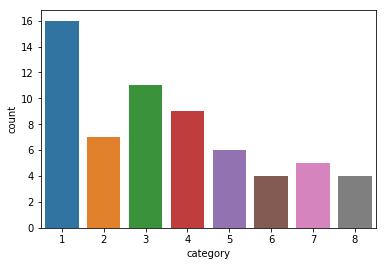

In [61]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='category', data=df)

In [62]:
df.groupby('category')['glycemic_index'].agg([min, max])

,min,max
category,,
1,28,75
2,55,81
3,36,76
4,39,87
5,34,86
6,16,32
7,40,87
8,15,103


### 결손 데이터 처리하기 : dimentia classification data
- dropna :	누락된 데이터가 있는 축(로우, 칼럼)을 제외시킨다. 어느 정도의 누락 데이터까지 용인할 것인지 지정할 수 있다.
- fillna :	누락된 데이터를 대신할 값을 채우거나 'ffill' 또는 'bfill' 같은 보간 메서드를 적용한다.
- isnull :	누락되거나 NA인 값을 알려주는 불리언 값이 저장된, 같은 형의 객체를 반환한다.
- notnull:	isnull과 반대되는 메서드다.

In [75]:
datafilename = "data/oasis_longitudinal.csv"

df = pd.read_csv(datafilename, header=0, encoding='utf-8')
df.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### - 데이터 구조 탐색

In [76]:
df.info()
# SES           354 non-null float64
# MMSE          371 non-null float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [77]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### - 결측치 확인

In [78]:
# 결측치가 있는 변수 확인
df.isnull().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [79]:
# 결측치가 있는 변수 및 갯수 확인
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

### - 결측치 삭제하기

In [80]:
# na가 있는 경우 해당 row 삭제
cleaned_df = df.dropna() 
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    354 non-null object
MRI ID        354 non-null object
Group         354 non-null object
Visit         354 non-null int64
MR Delay      354 non-null int64
M/F           354 non-null object
Hand          354 non-null object
Age           354 non-null int64
EDUC          354 non-null int64
SES           354 non-null float64
MMSE          354 non-null float64
CDR           354 non-null float64
eTIV          354 non-null int64
nWBV          354 non-null float64
ASF           354 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 44.2+ KB


In [81]:
# na가 있는 column을 삭제함
cleaned_df = df.dropna(axis=1)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 38.0+ KB


In [82]:
# threshold(임계값) 설정
cleaned_df = df.dropna(thresh=2)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 46.6+ KB


### - 결측치 채우기

#### : fillna을 이용하여 결측치 채우기

In [83]:
# 결측치인 데이터 확인하기
df[df['MMSE'].isnull()]
# index = 357, 358

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
357,OAS2_0181,OAS2_0181_MR2,Demented,2,539,F,R,75,12,NaN,NaN,1.0,1169,0.742,1.501
358,OAS2_0181,OAS2_0181_MR3,Demented,3,1107,F,R,77,12,NaN,NaN,1.0,1159,0.733,1.515


In [84]:
# MMSE 결측치 채우기 : 성별, 나이기준으로 median 
med_mmse = df[ (df['M/F']=='F') & (df['Age' ]>=70) & (df['Age' ]<80) ]['MMSE'].median()
print(med_mmse)
df['MMSE'] = df['MMSE'].fillna(med_mmse)
#df.loc[ df['MMSE'].isnull(),'MMSE'] = med_mmse

29.0


In [85]:
# 결측치가 잘 변경되었는지 확인
df.loc[357]
df.loc[358]

Subject ID        OAS2_0181
MRI ID        OAS2_0181_MR3
Group              Demented
Visit                     3
MR Delay               1107
M/F                       F
Hand                      R
Age                      77
EDUC                     12
SES                     NaN
MMSE                     29
CDR                       1
eTIV                   1159
nWBV                  0.733
ASF                   1.515
Name: 358, dtype: object

#### : boolean indexing을 이용하여 결측치 채우기

In [86]:
# SES 결측치 채우기 : 성별, 나이기준으로 median 값 얻기
med_ses_1 = df[ (df['M/F']=='M') & (df['Age' ]>=70) & (df['Age' ]<80) ]['SES'].median()
print(med_ses_1)
med_ses_2 = df[ (df['M/F']=='M') & (df['Age' ]>=80) & (df['Age' ]<90) ]['SES'].median()
print(med_ses_2)
med_ses_3 = df[ (df['M/F']=='F') & (df['Age' ]>=70) & (df['Age' ]<80) ]['SES'].median()
print(med_ses_3)
med_ses_4 = df[ (df['M/F']=='F') & (df['Age' ]>=80) & (df['Age' ]<90) ]['SES'].median()
print(med_ses_4)

df.loc[ (( df['SES'].isnull()) &  (df['M/F'] == 'M') & (df['Age' ] >= 70) & (df['Age' ] < 80) ),'SES']  = med_ses_1
df.loc[ (( df['SES'].isnull()) &  (df['M/F'] == 'M') & (df['Age' ] >= 80) & (df['Age' ] < 90) ),'SES']  = med_ses_2
df.loc[ (( df['SES'].isnull()) &  (df['M/F'] == 'F') & (df['Age' ] >= 70) & (df['Age' ] < 80) ),'SES']  = med_ses_3
df.loc[ (( df['SES'].isnull() )&  (df['M/F'] == 'F') & (df['Age'  ]>= 80) & (df['Age' ] < 90) ),'SES']  = med_ses_4

2.0
3.0
3.0
2.0


In [87]:
# 결측치가 있는 변수 확인
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64